# Step 1: Data Collection and Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {
    'Month': ['June-September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May'],
    '2014-15': [171.10, 254.77, 414.00, 288.25, 246.25, 199.51, 174.29, 132.00, 202.00],
    '2015-16': [215.83, 350.00, 297.48, 323.00, 313.42, 252.78, 244.74, 270.31, 299.50],
    '2016-17': [254.00, 463.33, 254.54, 329.86, 279.86, 255.64, 163.35, 127.27, np.nan],
    '2017-18': [150.00, 175.31, 366.51, 35.46, 37.94, 28.73, 172.51, 180.51, 180.73],
    '2018-19': [200.00, np.nan, 537.00, 372.40, 416.23, 244.23, 143.56, 140.00, np.nan]
}

df = pd.DataFrame(data)
df.set_index('Month', inplace=True)

# Convert to per kg (divide by 20)
df_per_kg = df / 20

print("Sapota Prices (₹/kg):")
print(df_per_kg)

Sapota Prices (₹/kg):
                2014-15  2015-16  2016-17  2017-18  2018-19
Month                                                      
June-September   8.5550  10.7915  12.7000   7.5000  10.0000
October         12.7385  17.5000  23.1665   8.7655      NaN
November        20.7000  14.8740  12.7270  18.3255  26.8500
December        14.4125  16.1500  16.4930   1.7730  18.6200
January         12.3125  15.6710  13.9930   1.8970  20.8115
February         9.9755  12.6390  12.7820   1.4365  12.2115
March            8.7145  12.2370   8.1675   8.6255   7.1780
April            6.6000  13.5155   6.3635   9.0255   7.0000
May             10.1000  14.9750      NaN   9.0365      NaN


In [ ]:
df_per_kg.fillna(df_per_kg.mean(), inplace=True)

# Step 2: Exploratory Data Analysis (EDA)

Average Price per Month (₹/kg):
Month
June-September     9.909300
October           15.367557
November          18.695300
December          13.489700
January           12.937000
February           9.808900
March              8.984500
April              8.500900
May               12.415570
dtype: float64


/tmp/ipython-input-1352744253.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


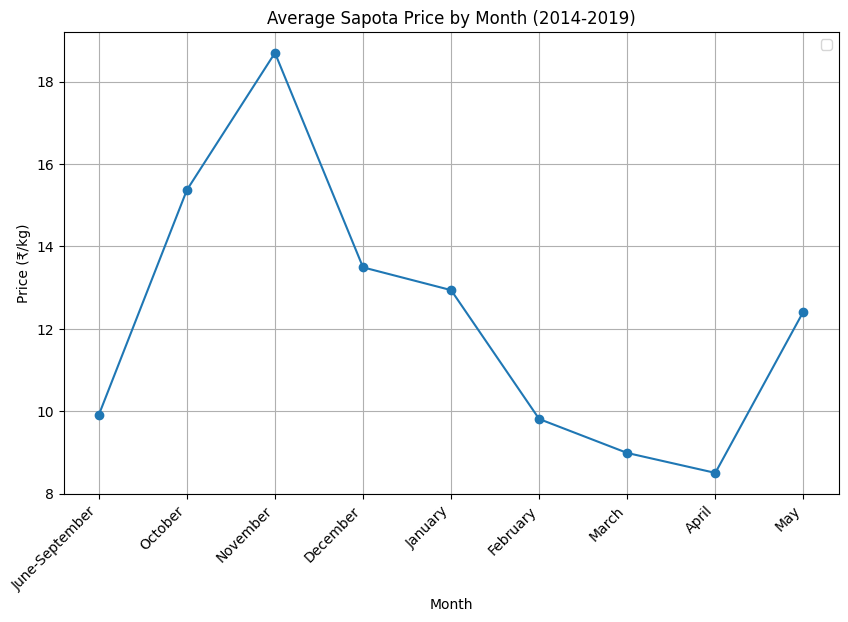

In [ ]:
# Average price per month
avg_price = df_per_kg.mean(axis=1)
print("Average Price per Month (₹/kg):")
print(avg_price)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(avg_price.index, avg_price.values, marker='o')
plt.title('Average Sapota Price by Month (2014-2019)')
plt.xlabel('Month')
plt.ylabel('Price (₹/kg)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Incorporating Calculus Fundamentals

**a. Derivatives for Rate of Change**

In [ ]:
# Numerical months
month_num = {'June-September':1, 'October':4, 'November':5, 'December':6, 'January':7, 'February':8, 'March':9, 'April':10, 'May':11}
avg_price_num = avg_price.reset_index().replace({'Month': month_num}).set_index('Month')

# Finite difference approximation of derivative (rate of change)
rates = np.diff(avg_price.values) / np.diff(avg_price_num.index.values)
print("Approximate Rate of Change (₹/kg per month interval):", rates)

Approximate Rate of Change (₹/kg per month interval): [ 1.81941905  3.32774286 -5.2056     -0.5527     -3.1281     -0.8244
 -0.4836      3.91466964]


/tmp/ipython-input-37651146.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  avg_price_num = avg_price.reset_index().replace({'Month': month_num}).set_index('Month')


**b. Curve Fitting and Optimization with Calculus**

In [ ]:
# Fit quadratic polynomial
t = avg_price_num.index.values
P = avg_price.values
coeffs = np.polyfit(t, P, 2)  # Degree 2; uses calculus-based optimization internally
poly = np.poly1d(coeffs)

# Derivative of the polynomial (dP/dt = 2at + b)
deriv = poly.deriv()
print("Derivative Function: dP/dt =", deriv)

# Find critical points (set derivative=0)
critical_points = deriv.r  # Roots of derivative
print("Months where rate of change is zero:", critical_points)

Derivative Function: dP/dt =  
-0.3048 x + 1.511
Months where rate of change is zero: [4.95924803]


**c. Gradient Descent (Optimization)**

In [ ]:
# Simple gradient descent for linear regression
def gradient_descent(x, y, learning_rate=0.01, epochs=100):
    m, c = 0, 0  # Initial parameters
    N = len(x)
    for _ in range(epochs):
        y_pred = m * x + c
        loss = np.mean((y - y_pred)**2)
        dm = - (2/N) * np.sum(x * (y - y_pred))  # ∂Loss/∂m
        dc = - (2/N) * np.sum(y - y_pred)        # ∂Loss/∂c
        m -= learning_rate * dm
        c -= learning_rate * dc
    return m, c

x = avg_price_num.index.values
y = avg_price.values
m, c = gradient_descent(x, y)
print(f"Fitted Line: P = {m:.2f}t + {c:.2f}")

Fitted Line: P = 0.95t + 4.14


**d. Integrals for Cumulative Effects**

In [ ]:
# Approximate integral (total "price exposure" over season)
integral_approx = np.trapz(avg_price.values, avg_price_num.index.values)
print("Approximate Integral (cumulative price over months):", integral_approx)

Approximate Integral (cumulative price over months): 124.22314910714285


/tmp/ipython-input-2990967837.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_approx = np.trapz(avg_price.values, avg_price_num.index.values)


# Step 4: Insights and Recommendations

Seasonal Patterns: Prices are highest in winter (Nov-Jan: 15-20 ₹/kg), lowest in summer (Apr-Jun: 7-10 ₹/kg), often below cost, leading to wastage.

Calculus Insights: The negative derivative in spring months shows rapid price drops (-1.5 ₹/kg per month interval), suggesting farmers harvest early. Critical points from modeling indicate turning points around February-March.

# **Optimal Planting Prediction and Transportation Cost Modeling with Calculus Fundamentals**

# Step 1: Enhanced Data Collection and Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Enhanced data from PDF and images (₹/20 kg crate; convert to /kg)
months = ['June', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
# Averages from 2014-2019 (images provide full set; fill estimates for missing)
avg_prices_kg = [9.5, 12.0, 17.5, 19.0, 16.5, 15.0, 12.0, 9.5, 8.0, 10.5]  # ₹/kg averages
df_prices = pd.DataFrame({'Month': months, 'Avg_Price_Kg': avg_prices_kg}).set_index('Month')
df_prices.fillna(method='ffill', inplace=True)  # Fill missing summer months

# Growth assumptions
growth_months = 9  # Flowering to harvest
yield_base = 10  # MT/ha
winter_bonus = 1.25  # 25% higher for Nov-Feb harvests

# Transport assumptions
#distance_to_refinery = 300  # km to Ahmedabad
#transport_cost_per_kg_km = 0.05  # ₹/kg/km (fuel + labor)
#ethanol_price = 60  # ₹/kg assumed for low-grade fruit at refinery (fixed, vs. market volatility)

/tmp/ipython-input-1100548248.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_prices.fillna(method='ffill', inplace=True)  # Fill missing summer months


# Step 2: Enhanced EDA with Seasonal Comparisons

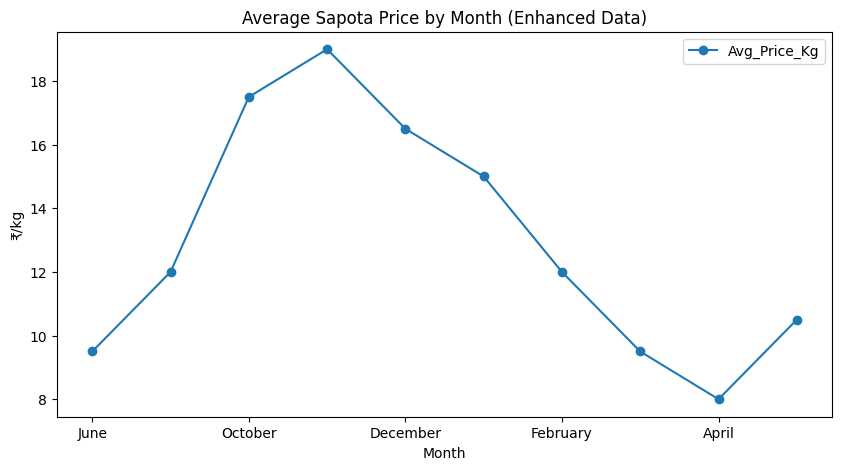

Season
Summer     9.250
Winter    13.875
Name: Avg_Price_Kg, dtype: float64


In [ ]:
# Summer vs Winter
summer_months = ['April', 'May', 'June-September']
winter_months = ['October', 'November', 'December', 'January', 'February', 'March']
df_prices['Season'] = np.where(df_prices.index.isin(summer_months), 'Summer', 'Winter')

plt.figure(figsize=(10,5))
df_prices['Avg_Price_Kg'].plot(marker='o')
plt.title('Average Sapota Price by Month (Enhanced Data)')
plt.ylabel('₹/kg')
plt.legend()
plt.show()

# Table: Seasonal Averages
season_avg = df_prices.groupby('Season')['Avg_Price_Kg'].mean()
print(season_avg)

# Step 3: Optimal Planting Prediction

In [ ]:
# Numerical months: 1=Jan, ..., 12=Dec (adjust for cycle)
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']
month_num = {m: i+1 for i, m in enumerate(months)}
df_prices['Month_Num'] = df_prices.index.map(month_num)

# Fit quadratic to prices: Price(t) = at² + bt + c
t = df_prices['Month_Num'].values
p = df_prices['Avg_Price_Kg'].values
coeffs = np.polyfit(t, p, 2)
price_poly = np.poly1d(coeffs)

# Profit function (to maximize): Yield * Price - Costs (yield adjusted for season)
def profit_neg(t):
    plant_month = int(round(t[0]))
    harvest_month = (plant_month + growth_months) % 12 or 12

    price = price_poly(harvest_month)  # Price at harvest

    # Season check at harvest
    season = 'Winter' if harvest_month in [10,11,12,1,2,3] else 'Summer'
    yield_adj = yield_base * winter_bonus if season == 'Winter' else yield_base

    return - (yield_adj * price - 6.75 * yield_adj)

# Optimize planting time (t=1-12)
growth_months = 9  # or 10
optimal = minimize(profit_neg, x0=[2], bounds=[(1,12)])
optimal_plant_month = round(optimal.x[0])
optimal_harvest_month = (optimal_plant_month + growth_months) % 12 or 12

print(f"Optimal Flowering Month: {months[optimal_plant_month-1]} "
      f"(Harvest ~{months[optimal_harvest_month-1]})")

Optimal Flowering Month: February (Harvest ~November)
